# FIFA-19 Prediction and Exploratory Analysis

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


In [140]:
os.chdir('E:\\projects_personal\\analysis\\fifa19')

In [141]:
df = pd.read_csv("FIFA19.csv")

In [160]:
df.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Speciality,Difference,Evolution
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,6.0,11.0,15.0,14.0,8.0,€226.5M,LALIGA SANTANDER,Complete Forward,0,Stable
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,7.0,11.0,15.0,14.0,11.0,€127.1M,SERIE A TIM,Distance Shooter,0,Stable
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,9.0,9.0,15.0,15.0,11.0,€228.1M,LIGUE 1 CONFORAMA,Complete Forward,1,None
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,90.0,85.0,87.0,88.0,94.0,€138.6M,PREMIER LEAGUE,Goalkeeper,2,Small
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,15.0,13.0,5.0,10.0,13.0,€196.4M,PREMIER LEAGUE,Complete Midfielder,1,None


In [143]:
df.describe().head()

,Unnamed: 0,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,...,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,9089.239599,25.121122,66.253926,71.324076,1.113297,2.947154,2.361492,19.546096,49.738414,45.550229,...,48.546371,58.651127,47.286053,47.701879,45.666336,16.616906,16.393839,16.233041,16.389651,16.712019
std,5257.923360,4.669796,6.913320,6.132286,0.394150,0.660498,0.756274,15.947765,18.364255,19.527445,...,15.703113,11.437138,19.900450,21.663630,21.287961,17.698612,16.909971,16.504103,17.037031,17.957521
min,0.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4536.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [144]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Jersey Number',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'League', 'Speciality'],
      dtype='object')

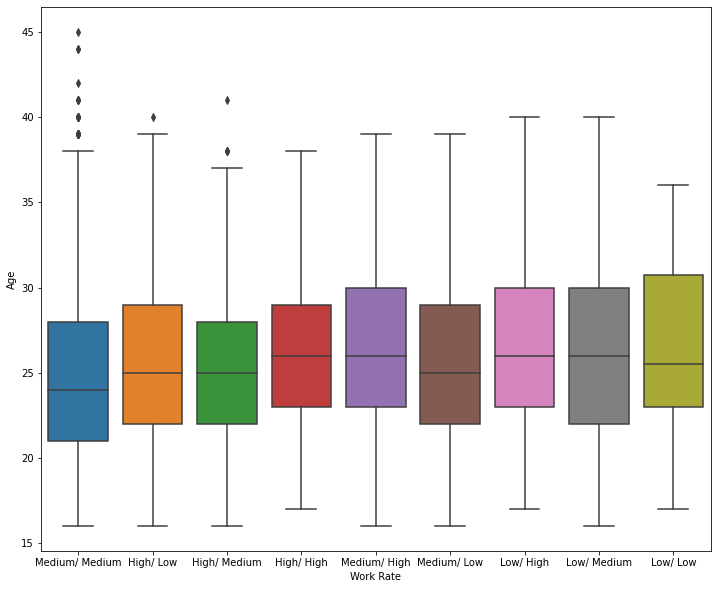

In [145]:
plt.figure(figsize = (12,10))
sns.boxplot(x = "Work Rate", y = "Age", data = df)
plt.show()

In [174]:
jer_no = df["Jersey Number"].value_counts()[:10]
jer_no

8.0     612
7.0     604
10.0    593
Name: Jersey Number, dtype: int64

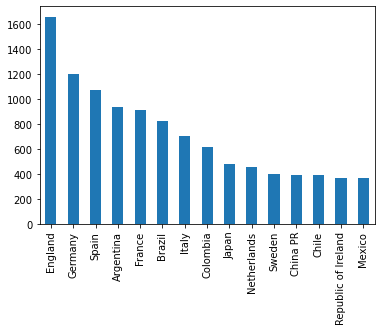

In [147]:
df["Nationality"].value_counts()[:15].plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'Player preferred Foot')

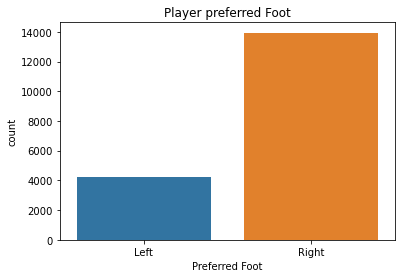

In [148]:
sns.countplot(df['Preferred Foot'])
plt.title('Player preferred Foot')

In [175]:
df['Difference'] = df['Potential']-df['Overall']

def evolution(d):
    if d==0:
        return 'Stable'
    elif d>1 and d<=5:
        return 'Small'
    elif d>6 and d<=10:
        return 'Medium'
    elif d>10:
        return 'Large'
   
 
df['Evolution'] = df['Difference'].apply(evolution)
promising = df.loc[(df['Evolution']== 'Large') & (df['Potential']>90)].sort_values(by='Potential', ascending=False)[:10]

In [176]:
cols  = ['Name','Club','Overall','Age','Potential','Value']
promising[cols]

,Name,Club,Overall,Age,Potential,Value
229,G. Donnarumma,Milan,82,19,93,€29M
1143,Vinícius Júnior,Real Madrid,77,17,92,€17.5M


In [177]:
df["Wage"].head()

0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object

In [180]:
df.groupby(["League"]).sum()

,Unnamed: 0,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Difference
League,,,,,,,,,,,,,,,,,,,,,
0,52335563,134689,347416,373629,5498.0,15620.0,12222.0,98153.0,259979.0,237280.0,...,304357.0,248598.0,250048.0,239473.0,88021.0,87364.0,86322.0,87058.0,88392.0,26213
3. LIGA,1918262,3781,9731,10573,156.0,501.0,351.0,2652.0,7086.0,6407.0,...,8284.0,6884.0,6911.0,6580.0,2564.0,2547.0,2451.0,2452.0,2565.0,842
ALLSVENSKAN,4519367,9458,23716,25730,386.0,1051.0,824.0,7317.0,17653.0,16072.0,...,21259.0,17714.0,16510.0,15908.0,6205.0,6195.0,6156.0,6099.0,6260.0,2014
BUNDESLIGA,2560120,13096,39282,42481,794.0,1699.0,1420.0,10610.0,29662.0,26816.0,...,34379.0,27648.0,27978.0,26429.0,9701.0,9375.0,9240.0,9446.0,9779.0,3199
BUNDESLIGA 2,219017,671,2054,2316,36.0,102.0,71.0,531.0,1519.0,1320.0,...,1743.0,1419.0,1478.0,1441.0,500.0,510.0,461.0,473.0,505.0,262
CALCIO B,4100967,10646,27800,30034,438.0,1211.0,979.0,7501.0,20327.0,18128.0,...,25283.0,19976.0,20095.0,19419.0,6767.0,6727.0,6544.0,6585.0,6903.0,2234
CAMP. SCOTIABANK,2459044,5492,13959,15248,221.0,621.0,477.0,3628.0,10294.0,9613.0,...,11945.0,10208.0,9645.0,9141.0,3416.0,3452.0,3441.0,3407.0,3574.0,1289
CSL,3962171,8808,20724,21855,378.0,978.0,724.0,6346.0,15519.0,13975.0,...,18136.0,15493.0,15239.0,14628.0,5365.0,5365.0,5541.0,5357.0,5477.0,1131
DOMINO'S LIGUE 2,2487418,6173,15740,17005,256.0,698.0,560.0,4082.0,12025.0,10571.0,...,14016.0,10677.0,11294.0,10887.0,3916.0,3804.0,3804.0,3951.0,3952.0,1265


In [181]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [198]:
# chooosing only import attritubes
df2 = pd.read_csv("FIFA19.csv")
attr = df2.iloc[:, 21:-3]
attr['Skill Moves'] = df2['Skill Moves']
workrate = df2['Work Rate'].str.get_dummies(sep='/ ')
attr = pd.concat([attr, workrate], axis=1)
# attr.columns
df2 = attr
attr = attr.dropna()
df2['Name'] = df["Name"]
df2 = df2.dropna()

In [201]:
df2.columns

Index(['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Skill Moves',
       'High', 'Low', 'Medium', 'Name'],
      dtype='object')

In [202]:
scaled = StandardScaler()
X = scaled.fit_transform(attr)

In [203]:
classifier = NearestNeighbors(n_neighbors=6,algorithm='ball_tree')
classifier.fit(X)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

In [205]:
player_index = classifier.kneighbors(X)[1]

In [206]:
player_index

array([[    0,     2,     5,    15,   236,    84],
       [    1,   124,   170,    17,   713,    93],
       [    2,     5,    65,    15,    25,    68],
       ...,
       [18144, 18003, 17145, 17982, 17944, 17956],
       [18145, 17856, 18059, 17481, 17957, 18029],
       [18146, 17857, 18030, 17876, 17456, 18074]], dtype=int64)

In [234]:
def get_index_number_of_player(x):
    return df2[df2['Name']==x].index.tolist()[0]

def recommend_players(player):
    print("5 Players similar to {} are : ".format(player))
    index =  get_index_number_of_player(player)
    for i in player_index[index][1:]:
        print(df2.iloc[i]['Name'])

In [239]:
recommend_players('M. Reus')

5 Players similar to M. Reus are : 
Marco Asensio
Ronaldo Cabrais
P. Dybala
F. Thauvin
E. Hazard


In [240]:
recommend_players('Marco Asensio')

5 Players similar to Marco Asensio are : 
Ronaldo Cabrais
Luis Alberto
João Novais
M. Reus
Bernardo Silva
